In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Первые 16 значений Res:
[ 1]  0.0  0.000  0.000
[ 2]  0.1  0.094  0.394
[ 3]  0.2  0.176  0.738
[ 4]  0.3  0.247  1.038
[ 5]  0.4  0.309  1.298
[ 6]  0.5  0.363  1.522
[ 7]  0.6  0.409  1.714
[ 8]  0.7  0.448  1.878
[ 9]  0.8  0.481  2.016
[10]  0.9  0.508  2.131
[11]  1.0  0.531  2.226
[12]  1.1  0.549  2.303
[13]  1.2  0.564  2.363
[14]  1.3  0.575  2.409
[15]  1.4  0.583  2.443
[16]  1.5  0.588  2.465

Первые 16 значений X:
[ 1] 1.000
[ 2] 0.905
[ 3] 0.819
[ 4] 0.741
[ 5] 0.670
[ 6] 0.606
[ 7] 0.548
[ 8] 0.496
[ 9] 0.449
[10] 0.406
[11] 0.368
[12] 0.333
[13] 0.301
[14] 0.272
[15] 0.246
[16] 0.223

Первые 16 значений Y:
[ 1] -0.081
[ 2] 0.071
[ 3] 0.253
[ 4] 0.260
[ 5] 0.406
[ 6] 0.569
[ 7] 0.398
[ 8] 0.418
[ 9] 0.364
[10] 0.695
[11] 0.587
[12] 0.514
[13] 0.505
[14] 0.475
[15] 0.501
[16] 0.584

Собственные значения A0: [-0.15+0.69101375j -0.15-0.69101375j]
Собственные значения Areal: [-4.18971647 -0.31028353]


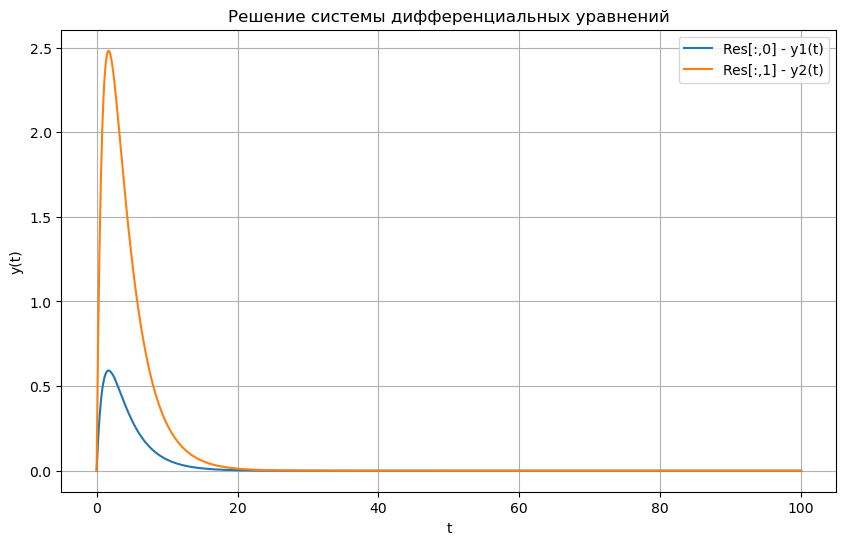

In [31]:
# 1. Параметры и матрицы
A0 = np.array([[-0.3, 1],
                    [-0.5, 0]])

Areal = np.array([[-4.5, 1],
                  [-1.3, 0]])

B = np.array([[1],
              [4.2]])

y0 = np.array([0, 0])

# 2. Функция для x(t)
def x_t(t):
  return np.exp(-t)

# 3. Функция для правой части системы ДУ
def D(t, y):
  return np.dot(Areal, y) + np.dot(B.flatten(), x_t(t))


# 4. Численное решение
t_start = 0
t_end = 100
num_steps = 1000
t_eval = np.linspace(t_start, t_end, num_steps)

sol = solve_ivp(D, (t_start, t_end), y0, t_eval=t_eval)

# 5. Извлечение результатов
Res = sol.y.T # Транспонируем для удобства доступа к столбцам
T = sol.t
X = np.exp(-T)
Y = Res[:, 0] + np.random.normal(0.0, 0.09, len(X))

# Вывод первых 16 значений Res, X, Y и T
print("Первые 16 значений Res:")
for i in range(16):
    print(f"[{i+1:2d}]  {T[i]:.1f}  {Res[i,0]:.3f}  {Res[i,1]:.3f}")
# print("\nПервые 16 значений T:")
# for i in range(16):
#     print(f"[{i+1:2d}] {T[i]:.3f}")
print("\nПервые 16 значений X:")
for i in range(16):
    print(f"[{i+1:2d}] {X[i]:.3f}")
print("\nПервые 16 значений Y:")
for i in range(16):
    print(f"[{i+1:2d}] {Y[i]:.3f}")

# Вывод собственных значений
eigenvalues_A0 = np.linalg.eigvals(A0)
eigenvalues_Areal = np.linalg.eigvals(Areal)
print("\nСобственные значения A0:", eigenvalues_A0)
print("Собственные значения Areal:", eigenvalues_Areal)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(T, Res[:, 0], label='Res[:,0] - y1(t)')
plt.plot(T, Res[:, 1], label='Res[:,1] - y2(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Решение системы дифференциальных уравнений')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
import numpy as np

def KAO(Y, X, delta_t = 0.1):

    # 1. Инициализация
    varphi1old = np.array([0, 0],dtype=float)
    varphi2old = np.array([0, 0],dtype=float)
    Pold = np.array([0, 0, 1, 20],dtype=float)
    theta10 = -1
    theta20 = -2
    Aold = np.array([[-1, 1],
                    [-2, 0]],dtype=float)

    A0new = np.eye(2) + np.dot(Aold.T, delta_t)

    Cnew = np.array([[delta_t], [0]])

    KAO_results = np.zeros((len(Y), 4)) #матрица для результатов KAO
    varphi1all_results = np.zeros((len(Y),2))
    varphi2all_results = np.zeros((len(Y),2))

    # 2. Функции
    def varphi1_update(varphi1old, z, A):
        return np.dot(A0new, varphi1old) + np.dot(Cnew, np.array([[z]])).flatten() # матричное умножение

    def varphi2_update(varphi2old, x, A):
      return np.dot(A0new, varphi2old) + np.dot(Cnew, np.array([[x]])).flatten() # матричное умножение

    def P_update(Pold, varphiold, z):
        return Pold + delta_t * varphiold * (z - np.dot(varphiold.T, Pold))


    # 3. Цикл
    for i in range(len(Y)):
        z = Y[i]
        x = X[i]

        varphi1new = varphi1_update(varphi1old, z, Aold)
        varphi2new = varphi2_update(varphi2old, x, Aold)
        varphiold = np.array([varphi1old[0],
                              varphi1old[1],
                              varphi2old[0],
                              varphi2old[1]])
        Pnew = P_update(Pold, varphiold, z)


        KAO_results[i, 0] = theta10 + Pnew[0]
        KAO_results[i, 1] = theta20 + Pnew[1]
        KAO_results[i, 2] = Pnew[2]
        KAO_results[i, 3] = Pnew[3]
        
        varphi1all_results[i, 0] = varphi1old[0]
        varphi1all_results[i, 1] = varphi1old[1]
        varphi2all_results[i, 0] = varphi2old[0]
        varphi2all_results[i, 1] = varphi2old[1]

        varphi1old = varphi1new
        varphi2old = varphi2new
        Pold[0] = Pnew[0]
        Pold[1] = Pnew[1]
        Pold[3] = Pnew[3]

    return KAO_results, varphi1all_results, varphi2all_results

# Пример использования
delta_t = 0.1
n = 1001

KAO_matrix, varphi1all, varphi2all = KAO(Y, X, delta_t)

print("Первые 5 строк KAO:")
for row in KAO_matrix[:16]:
  print(row)

print("\nПервые 5 строк varphi1all:")
for row in varphi1all[:16]:
  print(row)

print("\nПервые 5 строк varphi2all:")
for row in varphi2all[:16]:
  print(row)

Первые 5 строк KAO:
[-1. -2.  1. 20.]
[-0.99997643 -2.          0.99970985 20.        ]
[-0.99997371 -1.99998963  0.99769613 19.99987234]
[-1.00134531 -1.99994435  0.98684026 19.99834894]
[-1.00587143 -2.00010091  0.9734823  19.99351051]
[-1.01736563 -2.00099826  0.95713369 19.98247692]
[-1.04590857 -2.00425904  0.92888553 19.95806987]
[-1.08930039 -2.01213511  0.90850831 19.91747474]
[-1.15041641 -2.02731546  0.8905071  19.85565563]
[-1.21961337 -2.05011956  0.89098199 19.77771925]
[-1.31707073 -2.08476553  0.88617445 19.67416975]
[-1.43545032 -2.13421366  0.89118948 19.54614636]
[-1.56531675 -2.19971753  0.90551624 19.39768239]
[-1.70147404 -2.2820058   0.92568259 19.23212944]
[-1.83553526 -2.37952852  0.95066127 19.05622502]
[-1.9627355  -2.48910673  0.9774881  18.87758855]

Первые 5 строк varphi1all:
[0. 0.]
[-0.00812404  0.        ]
[-0.00021311 -0.0008124 ]
[ 0.02525254 -0.00083372]
[0.04890169 0.00169154]
[0.08430469 0.00658171]
[0.13140808 0.01501218]
[0.15510384 0.02815299]
[0

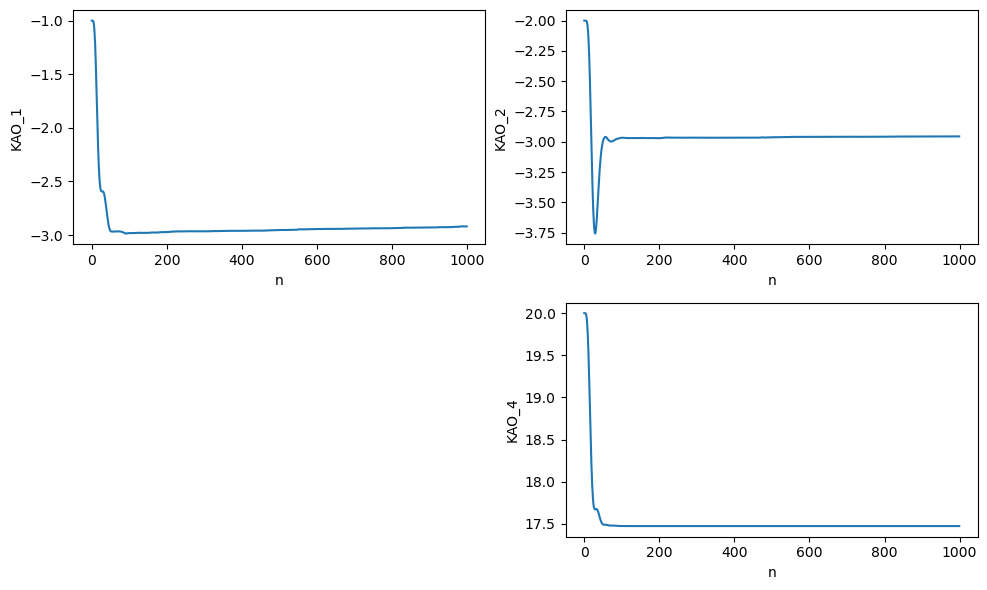

In [35]:
# Построение графика
plt.figure(figsize=(10, 6))
for i in range(len(KAO_matrix[0])):
    if i != 2:
        plt.subplot(2,2,i+1)
        plt.plot(KAO_matrix[:,i])
        plt.xlabel('n')
        plt.ylabel(f"KAO_{i+1}")
plt.tight_layout()
plt.show()

[-2.919548919995737, -2.9559106445571146, 1.0, 17.474487487265307]


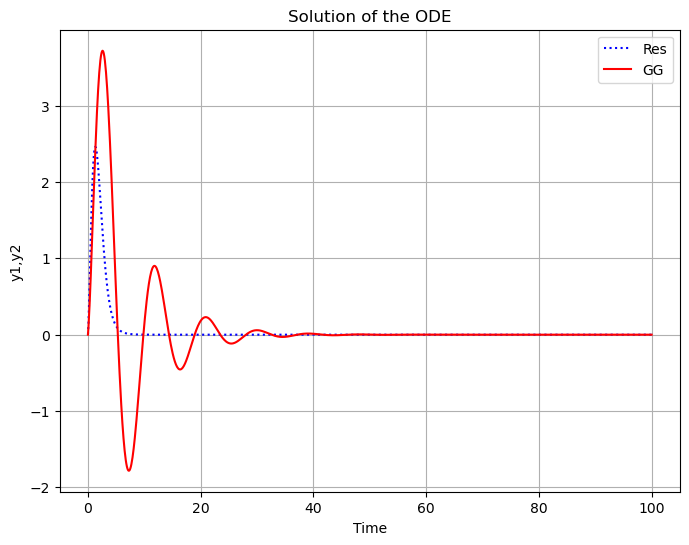

In [36]:
def D(t, y):
    Areal = np.array([[-0.3, 1],
                    [-0.5, 0]])
    B = np.array([1, 
                 4.2])
    return np.dot(Areal, y) + np.dot(B.flatten(), x_t(t))

def G(t, y, theta1,theta2,theta3,theta4):
    Areal = [[theta1,1],
             [theta2,0]]
    B = np.array([theta3,
                  theta4])
    return np.dot(Areal,y) + np.dot(B.flatten(), x_t(t))

thetas = [KAO_matrix[-1][0],
          KAO_matrix[-1][1],
          KAO_matrix[-1][2],
          KAO_matrix[-1][3]]
print(thetas)
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
solution = solve_ivp(G, t_span, y0, t_eval = t_eval, args=(thetas[0],thetas[1],thetas[2],thetas[3]))
solution2 = solve_ivp(D, t_span, y0, t_eval = t_eval)

plt.figure(figsize=(8,6))
plt.plot(solution.t, solution.y[0], 'b:', label='Res')
plt.plot(solution2.t, solution2.y[0], 'r-', label='GG')
plt.xlabel('Time')
plt.ylabel('y1,y2')
plt.legend()
plt.grid()
plt.title("Solution of the ODE")
plt.show()